# Exploratory Data Analysis

In [1]:
import pandas as pd

## Datetime Data Type

### Apakah perbedaan antara `pd.to_datetime()` dengan `astype('datetime64')`?

Method `pd.to_datetime()` lebih fleksibel jika dibandingkan dengan `astype('datetime64')`.
Hal ini dikarenakan penggunaan method `pd.to_datetime()` memungkinkan kita untuk melakukan transformasi bentuk datetime dengan menambahkan parameter-parameter. Contohnya terdapat parameter `format` untuk melakukan formatting urutan tanggal.

In [2]:
pd.to_datetime('30-11-2020', format='%d-%m-%Y') # tanggal, bulan, tahun

Timestamp('2020-11-30 00:00:00')

### Bagaimana cara menghitung selisih atau jeda tanggal?

Selisih tanggal dapat dihitung menggunakan *method* `timedelta()` pada *library* `datetime`.
Berikut dibawah ini adalah ilustrasi penggunaannya:

In [3]:
household = pd.read_csv('data_input/household.csv')
household['purchase_time'] = pd.to_datetime(household['purchase_time'])
household['weekday'] = household['purchase_time'].dt.day_name()
household.head(2)

receipt_id  receipts_item_id       purchase_time category sub_category  \
0     9622257          32369294 2018-07-22 21:19:00     Rice         Rice   
1     9446359          31885876 2018-07-15 16:17:00     Rice         Rice   

        format  unit_price  discount  quantity yearmonth weekday  
0  supermarket    128000.0         0         1   2018-07  Sunday  
1   minimarket    102750.0         0         1   2018-07  Sunday

Tabel di atas adalah sebuah DataFrame `household` yang memuat informasi transaksi kebutuhan rumah tangga. Kolom `purchase_time` berisi informasi tanggal pembelian barang. Jika diketahui durasi pengiriman sebuah barang adalah 2 hari setelah barang dibeli, maka kita dapat menghitung estimasi barang sampai ke tangan pembeli dengan menggunakan *code* berikut:

In [4]:
from datetime import timedelta
household['shipdate_est'] = household['purchase_time'] + timedelta(days=2)
household.head(2)

receipt_id  receipts_item_id       purchase_time category sub_category  \
0     9622257          32369294 2018-07-22 21:19:00     Rice         Rice   
1     9446359          31885876 2018-07-15 16:17:00     Rice         Rice   

        format  unit_price  discount  quantity yearmonth weekday  \
0  supermarket    128000.0         0         1   2018-07  Sunday   
1   minimarket    102750.0         0         1   2018-07  Sunday   

         shipdate_est  
0 2018-07-24 21:19:00  
1 2018-07-17 16:17:00

Apabila ingin lebih spesifik, kita dapat menambahkan parameter waktu lain pada `timedelta()`, mulai dari `weeks` hingga `microseconds` dengan contoh sebagai berikut:

In [5]:
household['shipdate_est_new'] = household['purchase_time'] + timedelta(weeks=0,
                                                                       days=1,
                                                                       hours=2,
                                                                       minutes=3,
                                                                       seconds=4,
                                                                       milliseconds=5,
                                                                       microseconds=6)
household.head(2)

receipt_id  receipts_item_id       purchase_time category sub_category  \
0     9622257          32369294 2018-07-22 21:19:00     Rice         Rice   
1     9446359          31885876 2018-07-15 16:17:00     Rice         Rice   

        format  unit_price  discount  quantity yearmonth weekday  \
0  supermarket    128000.0         0         1   2018-07  Sunday   
1   minimarket    102750.0         0         1   2018-07  Sunday   

         shipdate_est           shipdate_est_new  
0 2018-07-24 21:19:00 2018-07-23 23:22:04.005006  
1 2018-07-17 16:17:00 2018-07-16 18:20:04.005006

### Ketika menggunakan perintah `dt.to_period('W')`, maka secara otomatis rentang *week* yang ditampilkan selalu dimulai dari hari Senin. Apakah ada cara untuk menampilkan rentang *week* yang dimulai dari hari Minggu

Apabila ingin menampilkan rentang *week* yang dimulai dari hari Minggu, maka dapat dituliskan syntax sebagai berikut :

In [6]:
household['purchase_time'].dt.to_period('W-SAT')

0        2018-07-22/2018-07-28
1        2018-07-15/2018-07-21
2        2018-07-15/2018-07-21
3        2018-07-22/2018-07-28
4        2018-07-22/2018-07-28
                 ...          
71995    2017-12-24/2017-12-30
71996    2017-12-10/2017-12-16
71997    2017-12-24/2017-12-30
71998    2017-12-03/2017-12-09
71999    2017-12-17/2017-12-23
Name: purchase_time, Length: 72000, dtype: period[W-SAT]

### Bagaimana cara mengubah nama hari atau bulan kedalam format Bahasa Indonesia?

Cara terbaik untuk mengubah nama hari/bulan ke dalam Bahasa Indonesia adalah dengan mengubah *locale time* terlebih dahulu, kemudian gunakan *method* `strftime()` untuk mengekstrak komponen dari datetimenya.

Berikut adalah [referensi Python strftime](https://strftime.org/) untuk format penulisan strftime.

```
import locale
locale.setlocale(locale.LC_TIME, "id.UTF-8")

household['purchase_time'].dt.strftime("%A")
```

<img src="assets/EDA/output-hasil.png" width="400px" align="center"/>

### Bagaimana Menghadapi Beberapa Variasi Format Data Tanggal Dengan `pd.to_datetime()`

Seperti yang kita ketahui bahwa metode `pd.to_datetime()` memiliki kelebihan dalam mengolah format data tanggal yang berbeda-beda, berikut adalah beberapa contoh variansi bentukan data tanggal yang dapat diolah dengan bantuan metode `pd.to_datetime()`.



#### Data Tanggal Dengan Format Yang Berbeda

Salah satu momok yang sering dihadapi ketika mendapatkan data dari berbagai sumber yang berbeda adalah tidak adanya standarisasi bentukan data tanggal, sehingga pada kolom data tanggal bisa saja memiliki format yang bervariasi. Akan tetapi kita tidak perlu khawatir karena pada fungsi `pd.to_datetime()` terdapat parameter `format = ` yang dapat diisi dengan `mixed`.

Berikut adalah ilustrasi penggunaanya:

In [7]:
import pandas as pd

# dummy data dengan format awal tanggal-bulan-tahun
date = pd.Series(['01-02-2023', '02-Feb-2023', '03/02/2023', '2023-06-06'])
date

0     01-02-2023
1    02-Feb-2023
2     03/02/2023
3     2023-06-06
dtype: object

pd.to_datetime(date, 
               format = "mixed", # untuk menerima input data tanggal yang bervariasi
               dayfirst = True) # untuk memberikan informasi tanggal dulu yang di depan

#### Data Tanggal Dengan Format Julian

Salah satu bentukan data tanggal yang cukup unik adalah ***Julian***, format data tanggal tersebut adalah bentukan tanggal yang kontinu dari pertama kali digunakan pada zaman *Julian*, yang membuat berbeda dengan sistem tanggalan yang digunakan sekarang. 

Jika terdapat bentukan data tanggal tersebut, kita tidak perlul khawatir karena metode `pd.to_datetime()` bisa mengubah bentukan data tanggal tersebut menjadi bentukan tanggal yang kita ketahui, dengan menambahkan parameter `origin = 'julian'` dan `unit = 'D'`.

Parameter `origin = 'julian'` memiliki tujuan untuk memberi informasi bahwa data tanggal tersebut dalam satuan *julian* dan `unit = 'D'` untuk mengubah bentukan data *julian* menjadi data tanggal yang kita gunakan sekarang.

Berikut adalah ilustrasi penggunaanya:

In [8]:
import pandas as pd

# Membuat data dummy dalam format julian
julian = pd.Series(2460292.155498)
julian

0    2.460292e+06
dtype: float64

In [9]:
pd.to_datetime(julian, origin='julian', unit='D')

0   2023-12-13 15:43:55.027187968
dtype: datetime64[ns]

## Categorical Data Type

### Bagaimana cara mengetahui level pada category?

Cara mengetahui level pada category dapat menggunakan attribut `cat.categories` atau dapat menggunakan *method* `unique()`.
Berikut adalah contoh implementasinya:

In [10]:
# mengubah tipe data menjadi category
household[['category','sub_category','format','yearmonth','weekday']] = \
household[['category','sub_category','format','yearmonth','weekday']].astype('category')

In [11]:
household['format'].cat.categories

Index(['hypermarket', 'minimarket', 'supermarket'], dtype='object')

In [12]:
household['format'].unique()

['supermarket', 'minimarket', 'hypermarket']
Categories (3, object): ['hypermarket', 'minimarket', 'supermarket']

**Apa yang membedakan `cat.categories` dengan `unique()`**
- `cat.categories` adalah atribut milik tipe data categorical, sehingga tidak dapat digunakan selain tipe data categorical. 
- `unique()` adalah *method* yang dimiliki oleh `pandas` sehingga dapat digunakan secara fleksible untuk tipe data lainnya.

### Apabila langsung mengubah ke type category pada waktu method `read_csv()` apakah bisa?

Jika ingin sekaligus mengubah tipe data bersamaan dengan read_csv, bisa dilakukan dengan menambahkan `dtype = {"nama_kolom": "category"}`

Syntax:
```python
# syntax untuk menggunakan dtype pada read_csv
df = pd.read_csv('nama_file.csv', 
                dtype={'kolom1': tipe_data1, 'kolom2': tipe_data2, ...})
```

## Contingency Table

### Apa kegunaan parameter `margins=True` pada method `pd.crosstab`?

Parameter `margins=True` pada crosstab digunakan untuk menjumlahkan hasil cross tabulasi, sehingga ada kolom tambahan dengan nama kolom `"All"` yang berisi total nilai.

In [13]:
household_crosstab = \
pd.crosstab(
    index=household['category'],
    columns=household['format'],
    values=household['unit_price'],
    aggfunc='mean',
    margins=True
)
household_crosstab

format                 hypermarket    minimarket   supermarket           All
category                                                                    
Fabric Care           19328.141915  17757.135774  17847.557137  17893.793214
Rice                  71205.458458  67135.569554  74921.182150  70013.146313
Sugar/Flavored Syrup  13539.915728  12352.135470  13071.112361  12645.066024
All                   27079.468095  23460.177971  27457.145330  24830.776334

### Apakah kita dapat melakukan `sort_values()` pada kolom `All` saat parameter `margins=True`?

Bisa, kita dapat melakukan pengurutan seperti biasa dengan menganggap kolom `All` seperti kolom lainnya. Berikut adalah contohnya, `axis=0` digunakan untuk memastikan bahwa **baris** diurutkan berdasarkan kolom `All`:

In [14]:
household_crosstab.sort_values(by='All', axis=0)

format                 hypermarket    minimarket   supermarket           All
category                                                                    
Sugar/Flavored Syrup  13539.915728  12352.135470  13071.112361  12645.066024
Fabric Care           19328.141915  17757.135774  17847.557137  17893.793214
All                   27079.468095  23460.177971  27457.145330  24830.776334
Rice                  71205.458458  67135.569554  74921.182150  70013.146313

Sedangkan apabila kita menggunakan `axis=1`, **kolom** akan diurutkan berdasarkan baris `All`:

In [15]:
household_crosstab.sort_values(by='All', axis=1)

format                  minimarket           All   hypermarket   supermarket
category                                                                    
Fabric Care           17757.135774  17893.793214  19328.141915  17847.557137
Rice                  67135.569554  70013.146313  71205.458458  74921.182150
Sugar/Flavored Syrup  12352.135470  12645.066024  13539.915728  13071.112361
All                   23460.177971  24830.776334  27079.468095  27457.145330

### Bagaimana cara mengurutkan data di `pivot_table`?


Kita bisa menggunakan `.sort_values()` dengan parameter `ascending` berdasarkan nilai kolom yang namanya dicantumkan pada parameter `by`. Jika `ascending=True` (default), maka tabel yang terbentuk akan mengurutkan terkecil ke terbesal. 

Sebaliknya, jika `ascending=False`, maka urutan index baris akan sesuai dengan urutan nilai terbesar ke terkecil.

In [16]:
# contoh DataFrame
data = {'kategori': ['Buah', 'Sayur', 'Buah', 'Daging', 'Sayur'],
        'nilai': [10, 15, 8, 27, 12]}
df = pd.DataFrame(data)

df_sort = df.pivot_table(index='kategori', values='nilai', aggfunc='sum').sort_values(by=['nilai'], ascending=False)
df_sort


nilai
kategori       
Daging       27
Sayur        27
Buah         18

### Apa saja aggfunc yang bisa digunakan untuk membuat aggregation table?

Berikut adalah daftar fungsi agregasi yang tersedia untuk operasi groupby di Pandas:

1. **count / nunique**: Menghitung jumlah nilai non-null atau jumlah nilai unik.
2. **min / max**: Menghitung nilai minimum atau maksimum.
3. **first / last**: Mengembalikan nilai pertama atau terakhir dari setiap grup.
4. **unique**: Mengembalikan semua nilai unik dari grup.
5. **std**: Menghitung deviasi standar.
6. **sum**: Menghitung jumlah dari nilai-nilai.
7. **mean / median / mode**: Menghitung nilai rata-rata, median, atau modus.
8. **var**: Menghitung varians yang tidak bias.
9. **mad**: Menghitung deviasi mutlak rata-rata.
10. **skew**: Menghitung kemiringan (skewness) yang tidak bias.
11. **sem**: Menghitung standar error dari mean.
12. **quantile**: Menghitung kuantil.

Fungsi-fungsi ini digunakan ketika melakukan operasi groupby pada Pandas DataFrame untuk mengumpulkan data dalam grup berdasarkan kriteria tertentu dan menghitung statistik tertentu untuk setiap grup.

## Missing Values

### Bagaimana menampilkan data yang memiliki missing values saja?

Objek `household2` berikut adalah contoh DataFrame yang memiliki beberapa *missing values* didalamnya. 

In [17]:
household = pd.read_csv("data_input/household.csv", index_col=1, parse_dates=['purchase_time'])
household.drop(['receipt_id', 'yearmonth', 'sub_category'], axis=1, inplace=True)
household['weekday'] = household['purchase_time'].dt.day_name()
import math
x=[i for i in range(32000000, 32000005)]
x.insert(2,32030785)
household2 = household.head(6).copy()
household2 = household2.reindex(x)
household2 = pd.concat([household2, household.head(14)])
household2.loc[31885876, "weekday"] = math.nan

In [18]:
household2.head(10)

purchase_time category       format  unit_price  \
receipts_item_id                                                         
32000000                         NaT      NaN          NaN         NaN   
32000001                         NaT      NaN          NaN         NaN   
32030785         2018-07-17 18:05:00     Rice   minimarket     63500.0   
32000002                         NaT      NaN          NaN         NaN   
32000003                         NaT      NaN          NaN         NaN   
32000004                         NaT      NaN          NaN         NaN   
32369294         2018-07-22 21:19:00     Rice  supermarket    128000.0   
31885876         2018-07-15 16:17:00     Rice   minimarket    102750.0   
31930241         2018-07-15 12:12:00     Rice  supermarket     64000.0   
32418582         2018-07-24 08:27:00     Rice   minimarket     65000.0   

                  discount  quantity  weekday  
receipts_item_id                               
32000000               NaN       NaN      NaN  
32000001               NaN       NaN      NaN  
32030785               0.0       1.0  Tuesday  
32000002               NaN       NaN      NaN  
32000003               NaN       NaN      NaN  
32000004               NaN       NaN      NaN  
32369294               0.0       1.0   Sunday  
31885876               0.0       1.0      NaN  
31930241               0.0       3.0   Sunday  
32418582               0.0       1.0  Tuesday

Berikut adalah kode yang dapat digunakan untuk menampilkan data yang memiliki *missing values* saja.
- Method `.isna()` digunakan untuk melakukan pengecekan *missing values*
- Method `.any(axis=1)` mengecek apakah terdapat *missing values* pada **kolom**.

In [19]:
household2[household2.isna().any(axis=1)]

purchase_time category      format  unit_price  \
receipts_item_id                                                        
32000000                         NaT      NaN         NaN         NaN   
32000001                         NaT      NaN         NaN         NaN   
32000002                         NaT      NaN         NaN         NaN   
32000003                         NaT      NaN         NaN         NaN   
32000004                         NaT      NaN         NaN         NaN   
31885876         2018-07-15 16:17:00     Rice  minimarket    102750.0   

                  discount  quantity weekday  
receipts_item_id                              
32000000               NaN       NaN     NaN  
32000001               NaN       NaN     NaN  
32000002               NaN       NaN     NaN  
32000003               NaN       NaN     NaN  
32000004               NaN       NaN     NaN  
31885876               0.0       1.0     NaN

### Bagaimana cara menangani *missing values* pada data?

Terdapat berbagai cara menangani data yang mengandung *missing value*, yang paling umum adalah *deletion*, *full analysis*, dan *imputation*.

#### Deletion

Deletion adalah **membuang variabel/kolom** pada data yang memiliki jumlah *missing value* (NA) melebihi 50% dari jumlah observasi. Hal ini menganggap bahwa variabel tersebut tidak banyak memberikan informasi pada data. Ketika membuang variabel perlu memperhatikan business case dari data tersebut, apakah variabel yang dibuang akan menghilangkan informasi yang cukup signifikan atau tidak? Apakah ketika variabel tersebut dibuang ada informasi yang berkurang dari data tersebut atau tidak?

Di bawah ini adalah dataframe `household3` yang memiliki lebih dari 50% *missing values* pada variable `weekday` 

In [20]:
household3 = household.head(6).copy()
household3 = household3.reindex(x)
household3 = pd.concat([household3, household.head(9)])
household3.loc[31885876:32935097, "weekday"] = math.nan

In [21]:
household3

purchase_time category       format  unit_price  \
receipts_item_id                                                         
32000000                         NaT      NaN          NaN         NaN   
32000001                         NaT      NaN          NaN         NaN   
32030785         2018-07-17 18:05:00     Rice   minimarket     63500.0   
32000002                         NaT      NaN          NaN         NaN   
32000003                         NaT      NaN          NaN         NaN   
32000004                         NaT      NaN          NaN         NaN   
32369294         2018-07-22 21:19:00     Rice  supermarket    128000.0   
31885876         2018-07-15 16:17:00     Rice   minimarket    102750.0   
31930241         2018-07-15 12:12:00     Rice  supermarket     64000.0   
32418582         2018-07-24 08:27:00     Rice   minimarket     65000.0   
32561236         2018-07-26 11:28:00     Rice  supermarket    124500.0   
32030785         2018-07-17 18:05:00     Rice   minimarket     63500.0   
32935097         2018-07-29 18:18:00     Rice  supermarket     66500.0   
32593606         2018-07-25 12:48:00     Rice   minimarket     62500.0   
32573843         2018-07-26 16:41:00     Rice   minimarket     62500.0   

                  discount  quantity    weekday  
receipts_item_id                                 
32000000               NaN       NaN        NaN  
32000001               NaN       NaN        NaN  
32030785               0.0       1.0    Tuesday  
32000002               NaN       NaN        NaN  
32000003               NaN       NaN        NaN  
32000004               NaN       NaN        NaN  
32369294               0.0       1.0     Sunday  
31885876               0.0       1.0        NaN  
31930241               0.0       3.0        NaN  
32418582               0.0       1.0        NaN  
32561236               0.0       1.0        NaN  
32030785               0.0       1.0        NaN  
32935097               0.0       1.0        NaN  
32593606               0.0       1.0  Wednesday  
32573843               0.0       1.0   Thursday

Sebelum melakukan proses **deletion** mari cek terlebih dahulu jumlah proporsi *missing values* pada observasi.

In [22]:
household3.isna().sum()/len(household3)*100

purchase_time    33.333333
category         33.333333
format           33.333333
unit_price       33.333333
discount         33.333333
quantity         33.333333
weekday          73.333333
dtype: float64

Hasil pengecekan di atas, menunjukkan bahwa variable `weekday` memiliki 73% *missing values*. Dikarenakan jumlah *missing values* lebih dari 50% dari jumlah observasi pada data, maka variable `weekday` dapat dihapus.

In [23]:
household3.drop(columns='weekday',inplace=True)
household3

purchase_time category       format  unit_price  \
receipts_item_id                                                         
32000000                         NaT      NaN          NaN         NaN   
32000001                         NaT      NaN          NaN         NaN   
32030785         2018-07-17 18:05:00     Rice   minimarket     63500.0   
32000002                         NaT      NaN          NaN         NaN   
32000003                         NaT      NaN          NaN         NaN   
32000004                         NaT      NaN          NaN         NaN   
32369294         2018-07-22 21:19:00     Rice  supermarket    128000.0   
31885876         2018-07-15 16:17:00     Rice   minimarket    102750.0   
31930241         2018-07-15 12:12:00     Rice  supermarket     64000.0   
32418582         2018-07-24 08:27:00     Rice   minimarket     65000.0   
32561236         2018-07-26 11:28:00     Rice  supermarket    124500.0   
32030785         2018-07-17 18:05:00     Rice   minimarket     63500.0   
32935097         2018-07-29 18:18:00     Rice  supermarket     66500.0   
32593606         2018-07-25 12:48:00     Rice   minimarket     62500.0   
32573843         2018-07-26 16:41:00     Rice   minimarket     62500.0   

                  discount  quantity  
receipts_item_id                      
32000000               NaN       NaN  
32000001               NaN       NaN  
32030785               0.0       1.0  
32000002               NaN       NaN  
32000003               NaN       NaN  
32000004               NaN       NaN  
32369294               0.0       1.0  
31885876               0.0       1.0  
31930241               0.0       3.0  
32418582               0.0       1.0  
32561236               0.0       1.0  
32030785               0.0       1.0  
32935097               0.0       1.0  
32593606               0.0       1.0  
32573843               0.0       1.0

#### Full analysis

Full analysis adalah **membuang observasi/baris** yang mengandung *missing value*. Cara ini dilakukan jika jumlah observasi yang mengandung *missing value* tidak melebihi 5% dari total observasi data.

In [24]:
# code untuk generate dummy data

household = pd.read_csv("data_input/household.csv", index_col=1, parse_dates=['purchase_time'])
household.drop(['receipt_id', 'yearmonth', 'sub_category'], axis=1, inplace=True)
household['weekday'] = household['purchase_time'].dt.day_name()
import math
x=[i for i in range(32000000, 32000002)]
x.insert(2,32030785)
household4 = household.head(6).copy()
household4 = household4.reindex(x)
household4 = pd.concat([household4, household.head(40)])

Di bawah ini adalah dataframe `household4` yang memiliki kurang dari 5% *missing values* pada observasi.

In [25]:
household4.head(10)

purchase_time category       format  unit_price  \
receipts_item_id                                                         
32000000                         NaT      NaN          NaN         NaN   
32000001                         NaT      NaN          NaN         NaN   
32030785         2018-07-17 18:05:00     Rice   minimarket     63500.0   
32369294         2018-07-22 21:19:00     Rice  supermarket    128000.0   
31885876         2018-07-15 16:17:00     Rice   minimarket    102750.0   
31930241         2018-07-15 12:12:00     Rice  supermarket     64000.0   
32418582         2018-07-24 08:27:00     Rice   minimarket     65000.0   
32561236         2018-07-26 11:28:00     Rice  supermarket    124500.0   
32030785         2018-07-17 18:05:00     Rice   minimarket     63500.0   
32935097         2018-07-29 18:18:00     Rice  supermarket     66500.0   

                  discount  quantity   weekday  
receipts_item_id                                
32000000               NaN       NaN       NaN  
32000001               NaN       NaN       NaN  
32030785               0.0       1.0   Tuesday  
32369294               0.0       1.0    Sunday  
31885876               0.0       1.0    Sunday  
31930241               0.0       3.0    Sunday  
32418582               0.0       1.0   Tuesday  
32561236               0.0       1.0  Thursday  
32030785               0.0       1.0   Tuesday  
32935097               0.0       1.0    Sunday

Sebelum melakukan proses **pembuangan baris** mari cek terlebih dahulu jumlah proporsi *missing values* pada observasi.

In [26]:
((household4.isna().sum().sum()/household4.size)*100).round(2)

4.65

Hasil pengecekan di atas menunjukkan bahwa jumlah *missing values* tidak lebih dari 5% dari keseluruhan total observasi. Maka dapat dilakukan pembuangan baris pada nilai *missing*

In [27]:
household4.dropna(inplace=True)
household4.isna().sum()

purchase_time    0
category         0
format           0
unit_price       0
discount         0
quantity         0
weekday          0
dtype: int64

#### Imputation

Imputation adalah **mengisi *missing value*** dengan suatu nilai tertentu. Cara ini dilakukan apabila jumlah missing value pada data cukup banyak (melebihi 5% jumlah observasi). Imputation umum dilakukan berdasarkan business knowledge dari variabel tersebut. Misalkan variabel jumlah pengunjung per jam pada sebuah restoran, seharusnya terdapat jumlah visitor yang bernilai 0 pada jam-jam tertentu karena pasti terdapat kemungkinan pada jam-jam tertentu tidak terdapat pengunjung. Apabila secara business knowledge seharusnya observasi tersebut memiliki suatu nilai, kita bisa melakukan imputation dengan menggunakan pusat datanya seperti mean/median untuk variabel numerik dan modus untuk variabel kategorik.

In [28]:
household = pd.read_csv("data_input/household.csv", index_col=1)
household.drop(['receipt_id','purchase_time','yearmonth', 'sub_category'], axis=1, inplace=True)
import math
x=[i for i in range(32000000, 32000005)]
x.insert(2,32030785)
household5 = household.head(6).copy()
household5 = household5.reindex(x)
household5 = pd.concat([household5, household.head(14)])
household5['format'] = household5['format'].astype('category')

Di bawah ini adalah dataframe `household5` yang memiliki lebih dari 5% *missing values* pada observasi.

In [29]:
household5.head(10)

category       format  unit_price  discount  quantity
receipts_item_id                                                      
32000000              NaN          NaN         NaN       NaN       NaN
32000001              NaN          NaN         NaN       NaN       NaN
32030785             Rice   minimarket     63500.0       0.0       1.0
32000002              NaN          NaN         NaN       NaN       NaN
32000003              NaN          NaN         NaN       NaN       NaN
32000004              NaN          NaN         NaN       NaN       NaN
32369294             Rice  supermarket    128000.0       0.0       1.0
31885876             Rice   minimarket    102750.0       0.0       1.0
31930241             Rice  supermarket     64000.0       0.0       3.0
32418582             Rice   minimarket     65000.0       0.0       1.0

Pada dataframe tersebut di atas, terdapat missing values pada masing-masing kolomnya. 
Mari **asumsikan** berdasarkan *business knowledge* proses imputasi akan dilakukan berdasarkan ketentuan berikut:
1. variable `discount` dan `quantity` diisi dengan nilai 0
2. variable `category` diisi dengan kata "unknown"
3. variable `format` diisi dengan nilai pusat data (modus)
4. variable `unit_price` diisi dengan nilai pusat datanya

In [30]:
# 1. Mengisi variable discount dan quantity dengan nilai 0
household5[['discount','quantity']] = household5[['discount','quantity']].fillna(0)

In [31]:
# 2. Mengisi variable category dengan wording unknown
household5['category'] = household5['category'].fillna('unknown')

In [32]:
# 3. Mengisi variable format dengan pusat data (modus)
household5['format'] = household5['format'].fillna(household5['format'].mode()[0])

Sebelum melakukan imputasi pada variable `unit_price` sebaiknya lakukan pengecekan terhadap distribusi nilai pada `unit_price` terlebih dahulu. Hal ini untuk memastikan pusat data apa yang tepat untuk mengisi *missing values* pada data tersebut:
- Nilai **mean** dapat digunakan apabila tidak terdapat outlier yang signifikan dan distribusi cenderung normal.
- Nilai **median** sebaiknya digunakan apabila terdapat outlier atau distribusi data tidak normal.

<AxesSubplot:>

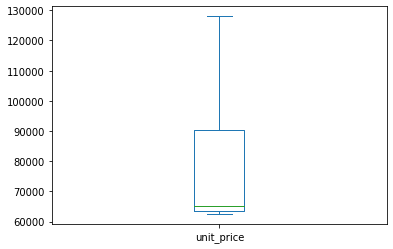

In [33]:
household5['unit_price'].plot(kind='box')

Boxplot di atas menunjukkan bahwa data tidak memiliki outlier/anomali, namun untuk distribusinya nilainya didominasi dengan rentang nilai di bawah 70000. Hal ini mengindikasikan distribusi data menjadi tidak normal atau *skewed*. Maka dari itu, cara lebih tepat untuk melakukan imputasi *missing values* pada *variable* `unit_price` adalah dengan menggunakan **median**.

In [34]:
household5['unit_price'] = household5['unit_price'].fillna(household5['unit_price'].median())
household5.head(10)

category       format  unit_price  discount  quantity
receipts_item_id                                                      
32000000          unknown   minimarket     65000.0       0.0       0.0
32000001          unknown   minimarket     65000.0       0.0       0.0
32030785             Rice   minimarket     63500.0       0.0       1.0
32000002          unknown   minimarket     65000.0       0.0       0.0
32000003          unknown   minimarket     65000.0       0.0       0.0
32000004          unknown   minimarket     65000.0       0.0       0.0
32369294             Rice  supermarket    128000.0       0.0       1.0
31885876             Rice   minimarket    102750.0       0.0       1.0
31930241             Rice  supermarket     64000.0       0.0       3.0
32418582             Rice   minimarket     65000.0       0.0       1.0